In [24]:
"""
jupyter notebook --generate-config
jupyter notebook --generate-config # jupyter notebook
jupyter lab --generate-config # jupyter lab

c.NotebookApp.allow_origin = '*' # jupyter notebook
c.ServerApp.allow_origin = '*' # jupyter lab

#c.NotebookApp.notebook_dir = '{시작 디렉토리}' # jupyter notebook
#c.SeverApp.notebook_dir = '{시작 디렉토리}' # jupyter lab

c.NotebookApp.port = '자신이 사용할 포트' # jupyter notebook
c.ServerApp.port = '자신이 사용할 포트' # jupyter lab


#c.NotebookApp.open_browser = False # jupyter notebook
#c.ServerApp.open_browser = False # jupyter lab

#토큰 없이 사용
c.ServerApp.token = ''
c.ServerApp.ip = '*'
"""

"\njupyter notebook --generate-config\njupyter notebook --generate-config # jupyter notebook\njupyter lab --generate-config # jupyter lab\n\nc.NotebookApp.allow_origin = '*' # jupyter notebook\nc.ServerApp.allow_origin = '*' # jupyter lab\n\n#c.NotebookApp.notebook_dir = '\x08{시작 디렉토리}' # jupyter notebook\n#c.SeverApp.notebook_dir = '\x08{시작 디렉토리}' # jupyter lab\n\nc.NotebookApp.port = '자신이 사용할 포트' # jupyter notebook\nc.ServerApp.port = '자신이 사용할 포트' # jupyter lab\n\n\n#c.NotebookApp.open_browser = False # jupyter notebook\n#c.ServerApp.open_browser = False # jupyter lab\n\n#토큰 없이 사용\nc.ServerApp.token = ''\nc.ServerApp.ip = '*'\n"

In [25]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [26]:
#모듈러
def readFileData(f_labels,f_strings):#csv 파일 reading and merge
    df_list = []
    for fp in f_strings:
        df_list.append(pd.read_csv(fp,names=f_labels))
    return pd.concat(df_list,axis=0)

def createData_rnn(data_arr,time_step=4):# 20개(총갯수) 16번(반복회수) 반복
    x_data = [];y_data = []
    for i in range(len(data_arr)-time_step):
        x_data.append(data_arr[i:time_step+i])
        y_data.append(data_arr[time_step+i])
    return np.array(x_data),np.array(y_data).reshape(-1,data_arr.shape[1])

In [27]:
#configure
from datetime import datetime
ROOT_PATH="d:\\" #구글 ./ 윈도우 d:\
SEP="\\"#web / 윈도우 \
TIME_STEP=48 #1년
TRAIN_MODEL="LSTM" # CONV,LSTM
DATA_LABELS = ["year_date","num_1","num_2","num_3","num_4","num_5","num_6","num_7"]
FILE_PATH = r'{}lotto_number{}chapter_1.csv'.format(ROOT_PATH,SEP),r'{}lotto_number{}chapter_0.csv'.format(ROOT_PATH,SEP)
data_frame = readFileData(DATA_LABELS,FILE_PATH)
#data_frame[["num_1","num_2","num_3","num_4","num_5","num_6","num_7"]]=\
#data_frame.loc[:,"num_1","num_2","num_3","num_4","num_5","num_6","num_7"].astype("float64")
#날짜 데이터 밀리세컨드 변형
data_frame["year_date"]=pd.to_datetime(data_frame["year_date"])
data_frame["millis"]=data_frame["year_date"].astype("int64")//10**9
print(data_frame[["year_date","millis"]])
print(data_frame.head())
print(datetime.strptime("2025-08-09","%Y-%m-%d").timestamp())#이번주 날짜 데이터 millis와 동일성 확인
# 시간데이터의 연결성을 위해서 각 번호를 시간 데이터로 나누기
# 시계열 데이터의 연결성을 위해서 1년 동안의 추출 순서를 적용하기


     year_date      millis
0   2025-08-02  1754092800
1   2025-07-26  1753488000
2   2025-07-19  1752883200
3   2025-07-12  1752278400
4   2025-07-05  1751673600
..         ...         ...
595 2003-01-04  1041638400
596 2002-12-28  1041033600
597 2002-12-21  1040428800
598 2002-12-14  1039824000
599 2002-12-07  1039219200

[1183 rows x 2 columns]
   year_date  num_1  num_2  num_3  num_4  num_5  num_6  num_7      millis
0 2025-08-02      4     15     17     23     27     36     31  1754092800
1 2025-07-26      1     13     21     25     28     31     22  1753488000
2 2025-07-19      8     10     14     20     33     41     28  1752883200
3 2025-07-12      6     12     18     37     40     41      3  1752278400
4 2025-07-05      3     16     18     24     40     44     21  1751673600
1754665200.0


In [28]:
#데이터 분석 단계
print(data_frame.head())

   year_date  num_1  num_2  num_3  num_4  num_5  num_6  num_7      millis
0 2025-08-02      4     15     17     23     27     36     31  1754092800
1 2025-07-26      1     13     21     25     28     31     22  1753488000
2 2025-07-19      8     10     14     20     33     41     28  1752883200
3 2025-07-12      6     12     18     37     40     41      3  1752278400
4 2025-07-05      3     16     18     24     40     44     21  1751673600


year_date    0
num_1        0
num_2        0
num_3        0
num_4        0
num_5        0
num_6        0
num_7        0
millis       0
dtype: int64


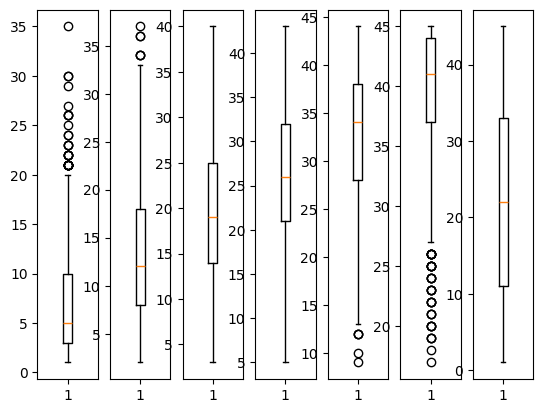

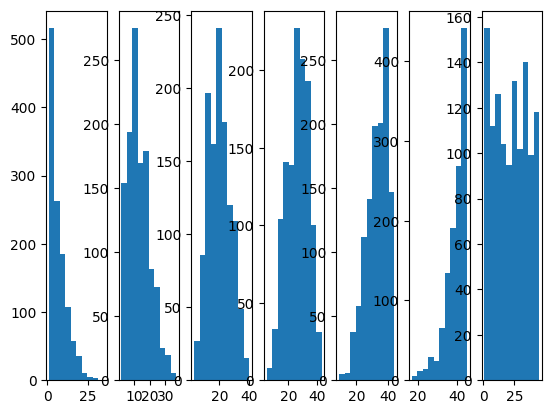

                 year_date        num_1        num_2        num_3  \
count                 1183  1183.000000  1183.000000  1183.000000   
mean   2014-04-05 00:00:00     6.743872    13.076923    19.930685   
min    2002-12-07 00:00:00     1.000000     2.000000     3.000000   
25%    2008-08-05 12:00:00     3.000000     8.000000    14.000000   
50%    2014-04-05 00:00:00     5.000000    12.000000    19.000000   
75%    2019-12-03 12:00:00    10.000000    18.000000    25.000000   
max    2025-08-02 00:00:00    35.000000    37.000000    40.000000   
std                    NaN     5.393280     6.866506     7.417015   

             num_4       num_5        num_6        num_7        millis  
count  1183.000000  1183.00000  1183.000000  1183.000000  1.183000e+03  
mean     26.205410    32.85038    39.469992    22.312764  1.396656e+09  
min       5.000000     9.00000    17.000000     1.000000  1.039219e+09  
25%      21.000000    28.00000    37.000000    11.000000  1.217938e+09  
50%      26.0

In [29]:
print(data_frame.isna().sum())#결측히 확인
plt.subplot(1,7,1)
plt.boxplot(data_frame["num_1"])
plt.subplot(1,7,2)
plt.boxplot(data_frame["num_2"])
plt.subplot(1,7,3)
plt.boxplot(data_frame["num_3"])
plt.subplot(1,7,4)
plt.boxplot(data_frame["num_4"])
plt.subplot(1,7,5)
plt.boxplot(data_frame["num_5"])
plt.subplot(1,7,6)
plt.boxplot(data_frame["num_6"])
plt.subplot(1,7,7)
plt.boxplot(data_frame["num_7"])
plt.show()
plt.subplot(1,7,1)
plt.hist(data_frame["num_1"])
plt.subplot(1,7,2)
plt.hist(data_frame["num_2"])
plt.subplot(1,7,3)
plt.hist(data_frame["num_3"])
plt.subplot(1,7,4)
plt.hist(data_frame["num_4"])
plt.subplot(1,7,5)
plt.hist(data_frame["num_5"])
plt.subplot(1,7,6)
plt.hist(data_frame["num_6"])
plt.subplot(1,7,7)
plt.hist(data_frame["num_7"])
plt.show()
#데이터 분포 확인 결과 이상치 데이터 없음
#로또 데이터 이므로 1사분위 데이터와 4사분위 데이터는 유지한다.
print(data_frame.describe())

In [30]:
def recoverData(data_arr,millis_sec):#(unit numpy_arr,milli second)
    millis_sec /= (10**8)
    return data_arr*millis_sec

# 데이터 전처리
raw_data = np.array(\
    data_frame.loc[:,["num_1","num_2","num_3","num_4",\
                      "num_5","num_6","num_7","millis"]])
print(raw_data.shape)
#데이터 스케일링(각숫자에 시간데이터를 활용하여 스케일링)
confirm_sec = raw_data[0][7]
print(raw_data[0][7])
print(raw_data[1][7])
print("원본숫자:",raw_data[0])
raw_data = np.array([np.concatenate([raw_data[i][:7] /(raw_data[i][7]/(10**8)),\
                                     [raw_data[i][7]]]) \
                                         for i in range(len(raw_data))])

print(raw_data.shape)
print(raw_data[:2])
#데이터 복구 확인
print("복원숫자:",recoverData(raw_data[0][:7],raw_data[0][7]))

(1183, 8)
1754092800
1753488000
원본숫자: [         4         15         17         23         27         36
         31 1754092800]
(1183, 8)
[[2.28038106e-01 8.55142898e-01 9.69161951e-01 1.31121911e+00
  1.53925722e+00 2.05234295e+00 1.76729532e+00 1.75409280e+09]
 [5.70291898e-02 7.41379468e-01 1.19761299e+00 1.42572975e+00
  1.59681731e+00 1.76790488e+00 1.25464218e+00 1.75348800e+09]]
복원숫자: [ 4. 15. 17. 23. 27. 36. 31.]


In [31]:
# lls = np.array([1,2,3,4,5])/3
# print(lls)
#데이터 리버싱
print(raw_data[0])#1
print(raw_data[1])#2
raw_data=raw_data[::-1]
print(raw_data[-1])#1 은 동일 값
print(raw_data[-2])#2 은 동일 값

[2.28038106e-01 8.55142898e-01 9.69161951e-01 1.31121911e+00
 1.53925722e+00 2.05234295e+00 1.76729532e+00 1.75409280e+09]
[5.70291898e-02 7.41379468e-01 1.19761299e+00 1.42572975e+00
 1.59681731e+00 1.76790488e+00 1.25464218e+00 1.75348800e+09]
[2.28038106e-01 8.55142898e-01 9.69161951e-01 1.31121911e+00
 1.53925722e+00 2.05234295e+00 1.76729532e+00 1.75409280e+09]
[5.70291898e-02 7.41379468e-01 1.19761299e+00 1.42572975e+00
 1.59681731e+00 1.76790488e+00 1.25464218e+00 1.75348800e+09]


In [32]:
#시계열 데이터 생성
print(raw_data.shape)
x_data,y_data = createData_rnn(raw_data,TIME_STEP)
print(x_data.shape,y_data.shape)


(1183, 8)
(1135, 48, 8) (1135, 8)


In [33]:
#최종 데이터 확인
# print(x_data[-1])
# print(y_data[-1])

In [34]:
#시계열 LSTM 모델 구현
import random as r
r.seed(1111)#랜덤시드 고정
np.random.seed(1111)
tf.random.set_seed(1111)
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Dense, LSTM,Bidirectional,Dropout
if TRAIN_MODEL=="LSTM":
    inp=Input((TIME_STEP,7))
if TRAIN_MODEL == "CONV":
    inp=Input((TIME_STEP,7,1))
conv1 = tf.keras.layers.ConvLSTM1D(16,3,strides=1,\
                           padding='same',return_sequences=True)
conv2 = tf.keras.layers.ConvLSTM1D(64,5,strides=1,\
                           padding='same',return_sequences=True)
conv3 = tf.keras.layers.ConvLSTM1D(128,5,strides=1,padding='same')
flat = tf.keras.layers.Flatten()
ls_model=Sequential()
ls_model.add(inp)
if TRAIN_MODEL=="LSTM":
    ls_model.add(Bidirectional(LSTM(16, return_sequences=True)))#양방향 LSTM
    ls_model.add(LSTM(32,return_sequences=True))
    ls_model.add(LSTM(64))
if TRAIN_MODEL == "CONV":
    ls_model.add(conv1)
    ls_model.add(conv2)
    ls_model.add(conv3)
    ls_model.add(flat)
ls_model.add(Dense(512,activation="relu"))
ls_model.add(Dropout(0.3))
ls_model.add(Dense(256,activation="relu"))
ls_model.add(Dropout(0.3))
ls_model.add(Dense(64,activation="relu"))
ls_model.add(Dense(32,activation="relu"))
ls_model.add(Dense(7,activation="linear"))
ls_model.compile(loss="mse",optimizer="adam",metrics=["mae"])


In [35]:
print(x_data[:,:,:7].shape)
print(y_data[:,:7].shape)
#조기종료
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True,
)
if TRAIN_MODEL == "CONV":
    x_data = x_data.reshape(x_data.shape[0],x_data.shape[1],x_data.shape[2],1)
#훈련 프린팅
class Printcb(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%10==0:
            print(f".{epoch}({logs['val_loss']:.2f})",end="")
        if epoch%100==0:
            print()
pcb = Printcb()
fhist = ls_model.fit(x_data[:,:,:7],y_data[:,:7],epochs=400,\
             validation_split=0.2,batch_size=len(x_data)//20,\
                     verbose=False,callbacks=[pcb,es])

(1135, 48, 7)
(1135, 7)
.0(0.38)
.10(0.23).20(0.22).30(0.23).40(0.22).50(0.23)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


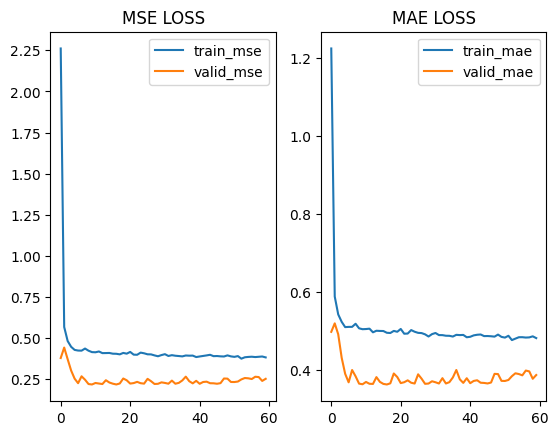

In [36]:
#산점도 그래프로 정답 일치성 확인
print(fhist.history.keys())
plt.subplot(1,2,1)
plt.plot(fhist.history["loss"],label="train_mse")
plt.plot(fhist.history["val_loss"],label="valid_mse")
plt.title("MSE LOSS")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fhist.history["mae"],label="train_mae")
plt.plot(fhist.history["val_mae"],label="valid_mae")
plt.title("MAE LOSS")
plt.legend()
plt.show()

In [37]:
#정확률 산정
def acc_ratecalc(y_pred,y_true,tmillis):
    if y_pred.shape!=y_true.shape:
        return f"정답과 예측의 모양이 틀립니다. 정답:{y_true.shape} 예측:{y_pred.shape}"
    if len(y_pred)!=len(tmillis):
        return f"예측파일과 시간밀리타임의 수량이 동일하지 않습니다. 예측수량:{len(y_pred)}"
    pred_res = np.array([np.round(recoverData(y_pred[i],test_millis[i])) for i in range(len(y_pred))])
    real_res = np.array([recoverData(y_true[i],test_millis[i]) for i in range(len(y_true))])
    p_sum = np.sum(pred_res,axis=-1)
    r_sum = np.sum(real_res,axis=-1)
    npercent = (p_sum/r_sum-1) * 100
    p_col_sum = np.sum(pred_res,axis=0)
    r_col_sum = np.sum(real_res,axis=0)
    col_percent = (p_col_sum/r_col_sum-1) * 100
    pstr = " , ".join([f"{col:.2f}%" for col in col_percent])
    print("각 필드별 예측오차율",pstr)
    print("전체예측오차율 평균:",f"{npercent.mean():.2f}%")
    import pickle
    with open(f"{ROOT_PATH}{SEP}lotto_number{SEP}{TRAIN_MODEL}_err_{TIME_STEP}","wb") as fp:
        pickle.dump([pstr,npercent.mean()],fp)
    

randIx = np.random.randint(0,len(x_data),300)
x_test = x_data[randIx]
y_test = y_data[randIx][:,:7]
test_millis = y_data[randIx][:,7]
y_pred = ls_model.predict(x_test[:,:,:7])
acc_ratecalc(y_pred,y_test,test_millis)

# print(y_pred.shape)
# pred_res = recoverData(y_pred[1],test_millis[1])
# real_res = recoverData(y_test[1][:7],test_millis[1])
# # #recoverData(data_arr,millis_sec):#(numpy_arr,milli second)  preproc_millis
# print("예측 번호 : ",pred_res)
# print("실제 번호 : ",real_res)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
각 필드별 예측오차율 1.08% , -1.16% , -0.83% , 0.84% , -0.07% , 0.29% , 6.09%
전체예측오차율 평균: 5.47%


In [38]:
ls_model.save(r"{}lotto_number{}{}_model_{}.keras".format(ROOT_PATH,SEP,TRAIN_MODEL,TIME_STEP))

In [39]:
#이번주 로또 번호 예측
#1. 데이터 생성하기
LAST_PATH = r"{}lotto_number{}last_recent.csv".format(ROOT_PATH,SEP)
recent_df = readFileData(DATA_LABELS,[LAST_PATH])
recent_df["year_date"]=pd.to_datetime(recent_df["year_date"])
recent_df["millis"]=recent_df["year_date"].astype("int64")//10**9

recent_data = np.array(\
    recent_df.loc[:,["num_1","num_2","num_3","num_4",\
                      "num_5","num_6","num_7","millis"]])
recent_data = np.array([np.concatenate([recent_data[i][:7] /(recent_data[i][7]/(10**8)),\
                                     [recent_data[i][7]]]) \
                                         for i in range(len(recent_data))])
print(recent_data.shape)
print(recent_data[:2])
recent_data=recent_data[::-1]
print("복원숫자:",recoverData(recent_data[-1][:7],recent_data[-1][7]))
x_pred,y_pred = createData_rnn(recent_data,TIME_STEP)
# print("x:",x_pred[-1])
# print("y:",y_pred[-1])
#예측 문제 데이터 재구성(맨 앞 1개 삭제 맨 뒤 1개는 y데이터 추가)
x_next_lotto = np.append(x_pred[-1][1:],y_pred[-1]).reshape(1,TIME_STEP,-1)
if TRAIN_MODEL == "CONV":
 x_next_lotto = x_next_lotto.reshape(x_next_lotto.shape[0],\
                                     x_next_lotto.shape[1],x_next_lotto.shape[2],1)

print("재구성:",x_next_lotto[:,:,:-1].shape)
y_next_lotto = ls_model.predict(x_next_lotto[:,:,:-1])
print(y_next_lotto.shape)
#이번주 날짜 밀리세컨
y_next_millis = datetime.strptime("2025-08-09","%Y-%m-%d").timestamp()
print(x_next_lotto[0][0][7])
print(y_next_millis)
rec_lotto_number=recoverData(y_next_lotto,y_next_millis)
print(np.round(rec_lotto_number))


(583, 8)
[[2.28038106e-01 8.55142898e-01 9.69161951e-01 1.31121911e+00
  1.53925722e+00 2.05234295e+00 1.76729532e+00 1.75409280e+09]
 [5.70291898e-02 7.41379468e-01 1.19761299e+00 1.42572975e+00
  1.59681731e+00 1.76790488e+00 1.25464218e+00 1.75348800e+09]]
복원숫자: [ 4. 15. 17. 23. 27. 36. 31.]
재구성: (1, 48, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 7)
1725667200.0
1754665200.0
[[ 7. 14. 20. 27. 34. 40. 24.]]
